In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

## Probabilidades

La matemática es la lógica de la certeza mientras que la probabilidad es la lógica de la incerteza, dice Joseph K. Blitzstein condensando el pensamiento de cientos de personas antes que el. Entender como pensar en presencia de incertezas es central en Ciencia de Datos. Esta incerteza tiene diversas fuentes, incluyendo datos incompletos, errores de medición, modelos aproximados, etc.

En este capítulo veremos una introducción breve a algunos conceptos centrales en probabilidad que nos permitiran entender mejor los fundamentos de varios métodos y procedimientos que veremos más adelante, para quienes tengan interés en profundizar en el tema recomiendo leer el libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein y Jessica Hwang.

En general, manejamos tres conceptos, relacionados entre si, sobre probabilidad:

* Decimos que una moneda tiene probabilidad 0.5 (o 50%) de caer cara, por que asumimos que ninguno de los dos eventos tiene preferencia sobre el otro. Es decir pensamos que ambos eventos son equi-probables. Esto se conoce como definición clásica o naive. Es la misma que usamos para decir que la probabilidad de obtener 3 al arrojar un dado (o cualquier número del 1 al 6) es de $\frac{1}{6}$, o que la probabilidad de tener una hija es de 0.5. Esta definición se lleva a las patadas com preguntas como ¿Cuál es la probabilidad de que exista vida en Marte?, claramente 0.5 es una sobreestimación, ya que el evento _vida_ y el evento _no-vida_ no son igualmente probables.

* Otra forma de ver a una probabilidad es como una fracción. En palabras de Piere-Simon Laplace: "Probability ... is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible". En esta concepción de probabilidad, en vez de asumir que los eventos son igualmente probables, diseñamos un experimentos (en el sentido muy amplio de la palabra) y contamos cuantas veces vemos el evento que nos interesa respecto del total de intentos. Esta definición de probabilidad nos permitiría estimar que la probabilidad de obtener 2 al arrojar un dado $n$ veces es de por ejemplo $\frac{1}{3}$ (y no necesariamente $\frac{1}{6}$). Esta noción de probabilidad, llamada frecuentista, se suele asociar con la idea de la existencia de un número _correcto_ al que nos aproximamos a medida que aumenta $n$. Por lo tanto, en el límite de $n$ tendiendo a infinito obtenemos la respuesta _correcta_:

$$p(x) = \lim_{n_t \rightarrow \infty} \frac{n_x}{n_t}$$


La definición frecuentista de probabilidad tiene el problema que no es muy útil para pensar en problemas que ocurren una sola vez. Por ejemplo, ¿Cuál es la probabilidad que mañana llueva? Estrictamente solo hay un mañana y o bien lloverá o bien no. Los frecuentistas suelen evadir este problema recurriendo a experimentos imaginarios. En ese caso podríamos intentar estimar la probabilidad de lluvia para mañana imaginando que hay una cantidad tendiente a infinito de _mañanas_ y luego contando en cuantos de esos _mañanas_ llueve  y en cuantos no.


* La tercer forma de pensar una probabilidad se refiere a cuantificar la incertidumbre que tenemos sobre la posibilidad que un evento suceda. Si el evento es imposible entonces la probabilidad de ese evento será exactamente 0, si en cambio el evento sucede siempre entonces la probabilidad de ese evento será de 1. Todos los valores intermedios reflejan grados de certeza/incerteza. Desde este punto de vista es _natural_ preguntarse cual es la probabilidad que la masa de Saturno sea $x$, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca. Esta tercer interpretación del concepto de probabilidad es llamado Bayesiana y se puede pensar como una versión que contiene como casos especiales a las definiciones frecuentista y clásica.


A pesar de estas diferentes formas de interpretar a las probabilidades la teoría de probabilidades nos ofrece un marco riguroso (en el sentido matemático) para trabajar con probabilidades.

## Probabilidades y conjuntos

El marco matemático para trabajar con las probabilidades se construye alrededor de los conjuntos (como los que vimos anteriormente). 

Imagine that an experiment is performed, resulting in one out of a set of possible outcomes. Before the experiment is performed, it is unknown which outcome will be the result; after, the result “crystallizes” into the actual outcome

(Sample space and event). The sample space S of an experiment
is the set of all possible outcomes of the experiment. An event A is a subset of the
sample space S, and we say that A occurred if the actual outcome is in A. Por ejemplo 

S = {1, 2, 3, 4, 5, 6}

El evento A podría ser obtener un 2 o podría ser obtener numeros impares u obtener números por encimar de 3 u obtener 3.14, etc. Cuan factible es que el evento A ocurra estará dado por la expresión $p(A)$. Entoences los eventos son conjuntos y las probabilidades son números asociados a la posibilidad que esos eventos ocurran, ya sea que esa "posibilidad" la definamos a partir de asumir todos los eventos equiprobables, o como una fracción de eventos favorables respecto del total de eventos o como el grado de certeza de obtener tal evento.

## Reglas de las probabilidades

Las probabilidades son números en el intervalo [0, 1], es decir números que van entre 0 y 1 (incluyendo ambos extremos) y que cumplen con las dos siguientes reglas.

La regla de la suma:
$$p(A) + p(A^c) = 1$$ 

Esto se lee como, _la probabilidad de A más la probabilidad del complemento de A (o la probabilidad de no-A) es igual a 1_. Es decir siempre algo sucede.

La regla del producto:
$$p(A, B) = p(A|B) \times p(B)$$ 

Esto se lee como la _probabilidad de que A y B ocurran es la probabilidad de A dado B por la probabilidad de B_. 


$p(A|B)$ es lo que se conoce como probabilidad condicional, y es la probabilidad de que ocurra A condicionada por el hecho que sabemos que B ha ocurrido. Por ejemplo la probabilidad que una vereda esté mojada es diferente de la probabilidad que la misma vereda esté mojada dado que está lloviendo. Una probabilidad condicional puede ser mayor, menor o igual que la probabiliad no-condicionada. Si el conocer B no ofrece información sobre A entonces $p(A|B) = p(A)$, y entonces A y B serán independientes. Al contrario si conocer B nos da información sobre A entonces la probabiliad condicional será mayor o menor que la no-condicionada dependiendo de si B nos hace que A sea menos o más probable. El concepto de probabilidad condicionales está en el corazón de la estadística y es central para pensar en como debemos actualizar el conocimiento que tenemos de un evento a la luz de nuevos datos, veremos más sobre este en el curso "Análisis Bayesiano de datos" y en "Machine Learning/mineria de datos". Por ahora dejamos este tema con la siguiente aclaración. Estrictamente todas las probabilidades son condicionales (respecto de algún supuesto o modelo) aún cuando no lo expresemos explícitamente. Podríamos decir que no existen probabilidades sin contexto.

### Variables aleatorias discretas

Dado un experimento (en sentido amplio) cuyo espacio muestreal es  $S$, una variable aleatoria $X$ (rv, RV del ingles random variable) es una función que mapea los resultados $s \in S$ a números en $\mathbb{R}$. Es común usar letras del alfabeto latino en mayusculas. Un _evento_ es uno de los posibles subconjuntos de $S$

Entonces una variable aleatoria $X$ asigna un número $X(s)$ a cada posible resultado $s$ de un experimento. Es importante notar que el mapeo es determinista, la aleatoriedad está dada por el experimento, es decir por no poder definir de forma precisa cual será el resultado. Las probabilidades de cada evento $s$ vienen dado por una función de probabilidad.

Supongamos que la variable aleatoria $X$ es "cantidad de caras al arrojar dos monedas". El espacio muestral es $S=\{HH, HT, TH, TT\}$. Según como hemos definido esta variable es posible obtener 3 eventos, $\{HH, (HT,TH), TT\}$ los cuales tienen asociados 3 números:

$$X(HH) = 2, X(HT) = X(TH) = 1, X(TT) = 0$$

Como se puede ver el "mapeo" es determinista, siempre a X(HH) le corresponde el número 2. ¿Cual es la razón o necesidad de este mapeo? Simplemente que es más facil trabajar con números que con letras como $HH$ o expresiones/conceptos complejos como "cantidad de caras al arrojar dos monedas" o "calorías per cápita en adultos de la ciudad de Resistencia", "agujeros negros binarios colapsando". En resumen poder hacer este mapeo es un _truco_ para poner en términos matemáticos relaciones entre objetos complejos (que en general no _son_ o no los pensamos como números). 

### Distribuciones de probabilidad

OK, todo bien hasta ahora pero en general no es este _mapeo determinista_ lo que nos interesa al trabajar con variables aleatorias es poder lidear conla aleatoriedad de los resultados, es decir el hecho que antes de arrojar las dos monedas no sabemos con absoluta certeza cual será el resultado. Solo sabemos esto una vez arrojadas las monedas. Lo interesante esta en poder hacer algo _en el medio_ es decir intentar anticipar o predecir el resultado o intentar describir las distintas posibilidades. Lo mejor que podemos hacer es calcular probabilidades de uno de estos evento, por ejemplo la probabilidad de obtener 2 caras lo podemos escribir como $P(X=2)$ o de forma abreviada $P(2)$. Al escribir $P(X=x)$, estamos indicando que $X=x$ es un evento que consiste en todos los resultados $s$ para los cuales X asigna el número $x$. Es decir el evento $\{X=x\}$ lo estamos definiendo como $\{s \in S : X(s) = x\}$, es común omitir todas estas aclaraciones y esperar que se _sobreentiendan_ a partir del contexto. Bien, retomando podemos decir entonces que la probabilidad $P(2) = 0.25$ (asumiendo igual probabilidad de cara y ceca para cada moneda). Es más podríamos construir una tabla con la probabilidad de cada evento.

$$P(2) = 0.25$$
$$P(1) = 0.50$$
$$P(0) = 0.25$$


En la práctica, en vez de escribir de forma explicita la probabilidad de cada uno de los posibles eventos podemos intentar definir una distribución de probabilidad. Esto es una función que especifica la probabilidad de cada uno de los posibles eventos asociados con una variable aleatoria. Cuando la variable aleatoria es discreta esta función se llama función de masa de probabilidad (pmf en inglés). Para cada evento $x$, esta función _devuelve_ como resultado $p(x) = P(X=x)$. Es decir, los valores posibles que puede _devolver_ una $pmf$ (su dominio) son probabilidades y por lo tanto están restringidos al intervalo $[0,1]$. Además si $x$ no esta en el soporte de $X$ entonces $p(x)=0$. Esto es facil de ver con el ejemplo anterior ¿Cúal es la probabilidad de obtener 4 caras al arrojar dos monedas? La respuesta es 0 simplemente por que "4 caras" no es un valor permitido.

Dijimos que a $X$ se la llama variable aleatoria, notese que _aleatoria_ no quiere decir que $X$ pueda tomar cualquier valor, de hecho solo puede tomar los valores definidos por su distribución de probabilidad. Algunas distribuciones de probabilidad son tan comunmente usadas que tienen nombre "propio", pero en principio nada impide que uno defina su propia distribucion de probabilidad. A continuación veremos algunos ejemplos:

#### Distribución uniforme discreta

Es una distribución que asigna igual probabilidad a un conjunto finitos de valores, su pmf es:

$$p(k | a, b)={\frac {1}{b - a}}$$

Para valores de $k = a, \ldots b -1$

Podemos usar esta distribución para modelar, por ejemplo un dado.

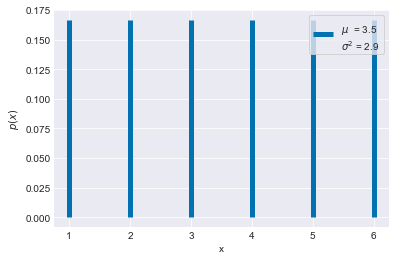

In [2]:
distri = stats.randint(1, 7)  # límite inferior, límite superior + 1
x = np.arange(1, 7)
x_pmf = distri.pmf(x)  # la pdf evaluada para todos los x_values
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C0', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución binomial

Es la [distribución](https://en.wikipedia.org/wiki/Binomial_distribution) de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre sí, con una probabilidad fija $p$ de ocurrencia del éxito entre los ensayos.
Cuando $n=1$ esta distribución se reduce a la distribución de Bernoulli.

$$p(x|n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

El término $p^x(1-p)^{n-x}$ indica la probabilidad de obtener $x$ éxitos en $n$ intentos. Este término solo tiene en cuenta el número total de éxitos obtenidos pero no la secuencia en la que aparecieron. El primer término conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el número de subconjuntos de $x$ elementos escogidos de un conjunto con $n$ elementos.

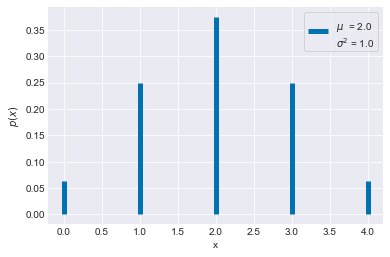

In [3]:
n = 4  # n=número de intentos
p = 0.5  #probabilidad del evento "1" 
distri = stats.binom(n, p)  
x = np.arange(0, n+1)
x_pmf = distri.pmf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C0', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución de Poisson

Es una [distribución](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $x$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una taza promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades pequeñas (sucesos _raros_), a medida que $\mu$ aumenta la distribución de asemeja cada vez más a una distribución Gaussiana (aunque sigue siendo discreta)

$$
p(x|\mu) = \frac{\mu^{x} e^{-\mu}}{x!}
$$

Tando la media comoa la varianza de esta distribución está dada por $\mu$. A medida que $\mu$ aumenta la distribución de Poisson se aproxima a una distribución Gaussiana.

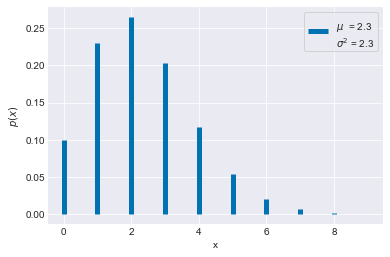

In [4]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x = np.arange(0, 10)
x_pmf = distri.pmf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C0', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

### Variables aleatorias y distribuciones de probabilidad continuas

El otro tipo más comunmente usado de variables aleatorias son las llamadas continuas, ya que toman valores en $\mathbb{R}$.

La diferencias más importante entre RVs discretas y continuas es que para las continuas $P(X=x) = 0$, es decir la probabilidad de cualquier valor es exactamente 0! Si prestaron atención a las gráficas anteriores se habrán dado cuenta que es la altura de las lineas lo que define la probabilidad de cada evento. Si sumamos las alturas siempre obtenemos 1, es decir la suma total de las probabilidades. En una distribución continua no tenemos _lineas_ si no que tenemos una curva continua y es la integral de esa curva, es decir el área bajo la curva, lo que nos da la probabilidad igual a 1. Entonces para obtener una probabilidad a partir de una pdf debemos integrar en un intervalo dado. La distribución de probabilidad para variables continuas se llama distribucion de densidad de probabilidad.


$$P(a \lt X \lt b) =  \int_a^b pdf(x) dx$$

A continuación veremos varias distribuciones. La curva naranja representa la pdf, mientras que el histograma (barras azules) representan muestras tomadas a partir de cada distribución.

#### Distribución uniforme

Aún siendo simple, la distribución [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estadística, por ej para representar nuestra ignorancia sobre el valor que pueda tomar un parámetro. La distribución uniforme tiene entropía cero (todos los estados son igualmente probables).

$$
p(x|a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  para\ x<a\ o\ x>b \end{cases}
$$

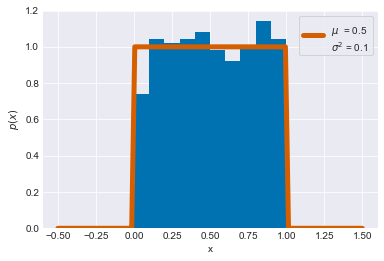

In [5]:
distri = stats.uniform(0, 1)  # distribución uniforme entre a=0 y b=1
x_values = np.linspace(-0.5, 1.5, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
media, varianza = distri.stats(moments='mv')
plt.plot (x_values, x_pdf, color='C2', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución Gaussiana (o normal)

Es quizá la [distribución](https://en.wikipedia.org/wiki/Normal_distribution) más conocida. Por un lado por que muchos fenómenos pueden ser descriptos (aproximadamente) usando esta distribución. Por otro lado por que posee ciertas propiedades matemáticas que facilitan trabajar con ella de forma analítica. Es por ello que muchos de los resultados de la estadística frecuentista se basan en asumir una distribución Gaussiana. Por ejemplo el método de los mínimos cuadrados para ajustar modelos lineales no es válido cuando los errores medidos se desvían de una distribución normal.

La distribución Gaussiana se define usando dos parámetros, la media $\mu$ y la desviación estándar $\sigma$. Una distribución Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribución Gaussiana estándar_.

$$
p(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

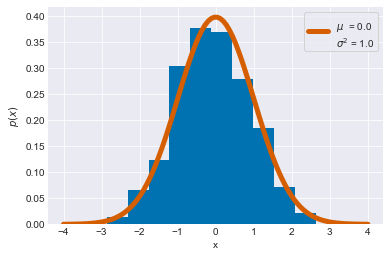

In [6]:
distri = stats.norm(loc=0, scale=1)  # media cero y desviación standard 1
x_values = np.linspace(-4, 4, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
media, varianza = distri.stats(moments='mv')
plt.plot (x_values, x_pdf, color='C2', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución t de Student

Históricamente esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgió para estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. En estadística Bayesiana su uso más frecuente es el de generar modelos robustos a datos aberrantes, como veremos mas adelante. 


$$p(x\mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}}
$$

donde $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un parámetro llamado _grados de libertad_ (nombre que tiene más sentido en un contexto frecuentista que en uno Bayesiano), como veremos a este parámetro le podríamos llamar _grado de normalidad_, ya que a medida que aumenta la distribución se aproxima a una Gaussiana. En el caso extremo de $\nu = \inf$ la distribución es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribución de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teoría esta distribución no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribución de Cauchy, la dispersión alrededor de la media será alta y esta dispersión no disminuirá a medida que aumente el tamaño de la muestra. La razón de este comportamiento extraño es que en distribuciones como la Cauchy están dominadas por lo que sucede en las colas de la distribución, contrario a lo que sucede por ejemplo con la distribución Gaussiana.

Para esta distribución $\sigma$ no es la desviación estandard, que como ya se dijo podría estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviación estándar de una distribución Gaussiana.

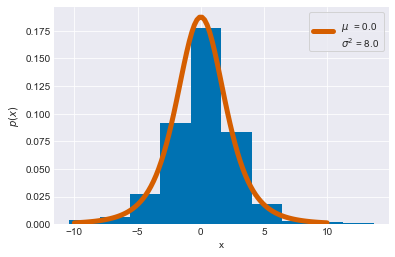

In [7]:
distri = stats.t(loc=0, scale=2, df=4) # media 0, escala 2, grados de libertad 4
x_values = np.linspace(-10, 10, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
media, varianza = distri.stats(moments='mv')
plt.plot (x_values, x_pdf, color='C2', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución exponencial

La distribución [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribución se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El número de tales eventos para un tiempo fijo lo da la distribución de Poisson (ver más adelante). Nosotros también la usaremos para fijar los _a prioris_ de $nu$ (los grados de libertad de distribución t de Student).

$$
p(x|\lambda) = \lambda e^{-\lambda x}
$$

La media y la desviación estandard de esta distribución están dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrización  diferente donde la escala es igual a $\frac{1}{\lambda}$

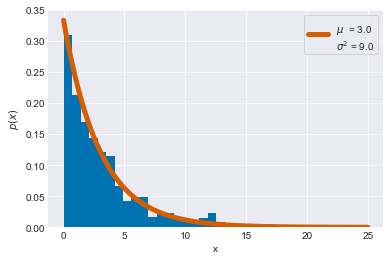

In [8]:
distri = stats.expon(scale=3)  # escala 3, lambda = 1/3
x_values = np.linspace(0, 25, 1000)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, bins=25, normed=True)
media, varianza = distri.stats(moments='mv')
plt.plot (x_values, x_pdf, color='C2', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución beta

Es una [distribución](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es útil para modelar proporciones o porcentajes. 

$$
p(x|\alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}
$$

El primer término es simplemente una constante de normalización que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribución beta se reduce a la distribución uniforme.

Si queremos expresar la distribución beta en función de la media y la dispersión alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una parámetro llamado concentración a media que $\kappa$ aumenta la dispersión disminuye. Notese, además que $\kappa = \alpha + \beta$.

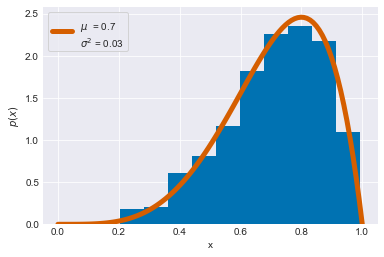

In [9]:
distri = stats.beta(5, 2)  # alfa=5, beta=2
x_values = np.linspace(0, 1, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
media, varianza = distri.stats(moments='mv')
plt.plot (x_values, x_pdf, color='C2', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.2f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución Gamma

Scipy parametriza a la distribución [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un parámetro $\alpha$ y uno $\theta$, usando estos parámetros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}}
$$

Una parametrización más común en estadística Bayesiana usa los parámetros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. Esta parametrización es usada por ejemplo por PyMC3. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
$$

Esta distribución la usaremos principalmente para fijar _a prioris_ para las desviaciones standard (o en general escalas) de otras distribuciones. En muchos casos puede resultar mas útil o intuitivo expresar una distribución gama en función de la media y desviación estandard, siguiendo las siguientes relaciones.

$\alpha = \frac{\mu^2}{\sigma^2}$;
$\beta = \frac{\mu}{\sigma^2}$;
$\theta = \frac{\sigma^2}{\mu}$

Como veremos, PyMC3 permite expresar la distribución gama directamente usando la media y desviación estandard, sin necesidad de tener que convertir parámetros usando las relaciones anteriores.

La distribución gamma se reduce a la exponencial cuando $\alpha=1$.

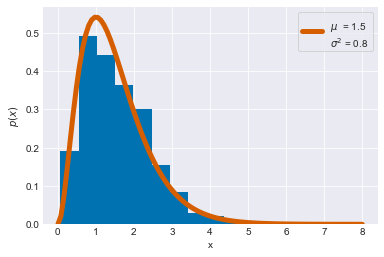

In [10]:
distri = stats.gamma(a=3, scale=0.5)  # alfa 3, theta 0.5
x_values = np.linspace(0, 8, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
media, varianza = distri.stats(moments='mv')
plt.plot (x_values, x_pdf, color='C2', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media), float(varianza)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución acumulada

La pdf (o la pmf) son formas comunes de representar y trabajar con variables aleatorias, pero no son las únicas formas posibles. Existen otras representaciones equivalentes. Por ejemplo la función de distribución acumulada (CDF en inglés). Al integrar una pdf se obtiene la correspondiente cdf, y al derivar la cdf se obtiene la pdf.

Figura relaciones entre pmf, cdf, pdf (y discretas continuas)


La integral de la $pdf$ es llamada función de distribución acumulada ($cdf$):

\begin{equation}
cdf(x) = \int_{-\infty}^{x} pdf(x) d(x)
\end{equation}

En algunas situaciones se prefiere hablar de la función de supervivencia:

\begin{equation}
S(x) = 1 - cdf 
\end{equation}

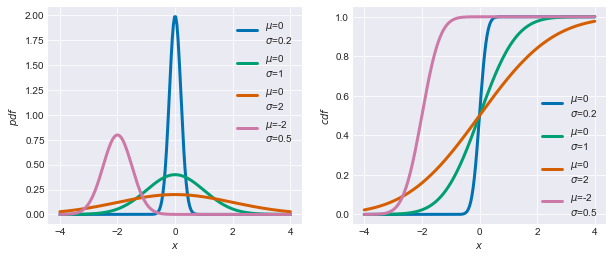

In [11]:
_, ax = plt.subplots(1,2, figsize=(10, 4))
x_values = np.linspace(-4, 4, 200)
values = [(0, .2), (0, 1), (0, 2), (-2, .5)]
color = ['C0', 'C1', 'C2', 'C3']
for val, c in zip(values, color):
    gauss = stats.norm(*val).pdf(x_values)
    ax[0].plot(x_values, gauss, lw=3, color=c,
             label='$\mu$={}\n$\sigma$={}'.format(*val))
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$pdf$')
ax[0].legend();

for val, c in zip(values, color):
    gauss = stats.norm(*val).cdf(x_values)
    ax[1].plot(x_values, gauss, lw=3, color=c,
               label='$\mu$={}\n$\sigma$={}'.format(*val))
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$cdf$')
ax[1].legend();

## Probability plot

Un método gráfico para comparar si un conjunto de datos se ajusta a una distribución teórica es comparar los valores esperados de la distribución teórica en el eje $x$ y en el eje $y$ los valores de los datos ordenados de menor a mayor. Si la distribución empírica fuese exactamente igual a la teórica los puntos caerían sobre la linea recta a $45^{\circ}$, es decir la linea donde $y = x$.

In [12]:
muestra = np.random.randn(100)

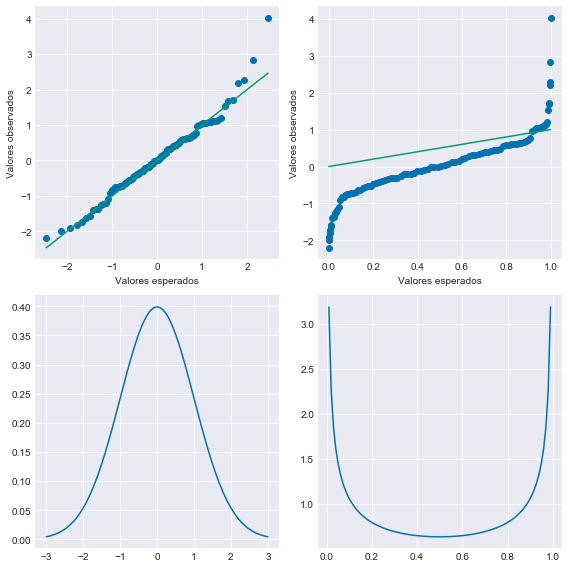

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
osm, osr = stats.probplot(muestra, fit=False, dist=stats.norm(0, 1))
plt.plot(osm, osr, 'o')
plt.plot(osm, osm)
plt.xlabel('Valores esperados')
plt.ylabel('Valores observados')

plt.subplot(2, 2, 2)
osm, osr = stats.probplot(muestra, fit=False, dist=stats.beta(0.5, 0.5))
plt.plot(osm, osr, 'o')
plt.plot(osm, osm)
plt.xlabel('Valores esperados')
plt.ylabel('Valores observados')

plt.subplot(2, 2, 3)
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm(0, 1).pdf(x))

plt.subplot(2, 2, 4)
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta(0.5, 0.5).pdf(x))

plt.tight_layout();

## ¿Por qué Normal?

La distribución Normal (o Gaussiana) aparece una y otra vez en teoría y en la práctica estadística. Esto ocurre principalmente por dos razones.

1. El teorema del límite central garantiza que la distribución Gaussiana surja (casi) siempre que calculemos promedios. 
1. Las distribuciones Gaussianas son, matemáticamente, simples de manipular. Por lo que históricamente han sido la base de la mayoría de los desarrollos en estadística.

## El teorema del límite central
El teorema del límite central dice que si tomamos $n$ valores (de forma independiente) de una distribución arbitraria, la media de esa variables sigue una distribución Gaussiana cuando $lim_{n\to\infty}$. Es decir aun cuando no sepamos nada sobre la distribución que genera los números podemos asegurar que la suma (o el promedio) de esas variables seguirá, de forma aproximada, una distribución Gaussiana.

Este resultado puede parecer sorprendente, pero tiene una explicación simple. Al tomar valores de una distribución los valores altos se compensan (en promedio) con los valores bajos, por lo que terminamos obteniendo una distribución suave y con un solo pico. Por supuesto este experimento mental no nos dice que la distribución deba ser una Gaussiana, para confirmar esto hay que sentarse y resolver el problema matemáticamente (o hacer una simulación como haremos brevemente)

Para que el teorema del límite central se cumpla se deben cumplir los siguientes supuestos.

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribución
1. La media y la desviación estándar de la distribución tiene que ser finita

Los criterios 1 y 2 se pueden relajar _bastante_ y aún así obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribución de Cauchy o Paretto, que no posen varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribución Cauchy no siguen una Gaussiana sino una distribución de Cauchy.

El teorema del límite central explica la prevalencia de la distribución Gaussiana en la naturaleza. Muchos de los fenómenos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, es decir tiene que ver con el cálculo de promedios.

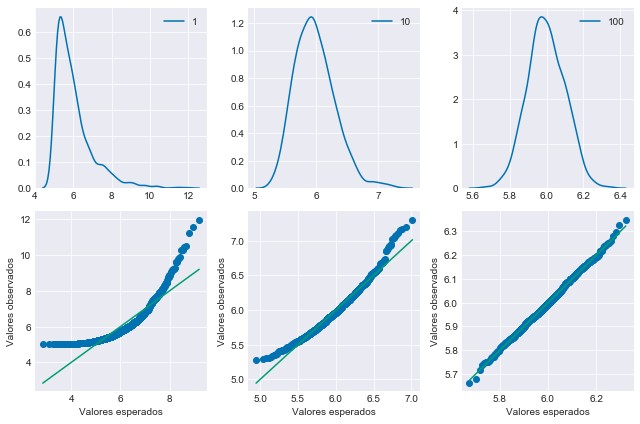

In [14]:
plt.figure(figsize=(9,6))
iters = 1000
distri = stats.expon(5)
for i, n in enumerate([1, 10, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)
    plt.subplot(2, 3, i+1)
    sns.kdeplot(sample, label=n)
    plt.subplot(2, 3, i+4)
    osm, osr = stats.probplot(sample, dist=stats.norm(sample.mean(), sample.std()), fit=False)
    plt.plot(osm, osr, 'o')
    plt.plot(osm, osm)
    plt.xlabel('Valores esperados')
    plt.ylabel('Valores observados')

plt.tight_layout()

## La ley de los grandes números (el casino siempre gana)

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribución. Al igual que el teorema del límite central esto no es cierto para la distribución de Cauchy (la cual no tiene media finita).

La ley de los grandes números se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la lotería/quiniela a un número _atrasado_, es decir un número que hace tiempo que no sale. El razonamiento, erróneo, es que como todos los números tienen la misma probabilidad a largo plazo (según la ley de los grande números) si un número viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese número en el próximo sorteo para así re-establecer la equiprobabilidad de los números. 

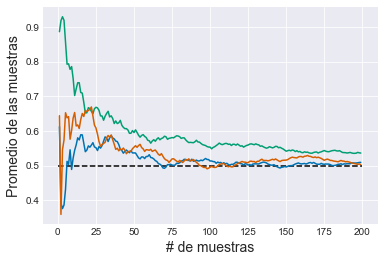

In [15]:
tamaño_muestra = 200
muestras = range(1, tamaño_muestra)
media = 0.5

for _ in range(3):
    muestra = stats.uniform(0, 1).rvs(tamaño_muestra)
    promedio = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, promedio, lw=1.5)

plt.hlines(media, 0, tamaño_muestra, linestyle='--', color='k')
plt.ylabel("Promedio de las muestras", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);